In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.applications import VGG16

from keras import models
from keras import layers
from keras import optimizers

image_size = 32

In [3]:
from keras.datasets import cifar10

num_classes = 10
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer.name, layer.trainable)

58892288/58889256 [==============================] - 2s 0us/step
input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [5]:

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 15,250,250
Trainable params: 535,562
Non-trainable params: 14,714,688
_________________________________________________________________


In [6]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [7]:
history = model.fit(x_train, y_train,
              batch_size=64,
              epochs=9,
              validation_data=(x_test, y_test))

Epoch 1/9
782/782 [==============================] - 557s 711ms/step - loss: 12.0021 - acc: 0.3015 - val_loss: 2.7639 - val_acc: 0.5450
Epoch 2/9
782/782 [==============================] - 555s 710ms/step - loss: 3.7583 - acc: 0.4537 - val_loss: 1.6098 - val_acc: 0.5548
Epoch 3/9
782/782 [==============================] - 556s 711ms/step - loss: 1.9670 - acc: 0.4932 - val_loss: 1.4051 - val_acc: 0.5684
Epoch 4/9
782/782 [==============================] - 554s 709ms/step - loss: 1.5539 - acc: 0.5399 - val_loss: 1.3604 - val_acc: 0.5858
Epoch 5/9
782/782 [==============================] - 556s 711ms/step - loss: 1.4103 - acc: 0.5708 - val_loss: 1.3252 - val_acc: 0.5922
Epoch 6/9
782/782 [==============================] - 556s 711ms/step - loss: 1.3074 - acc: 0.5974 - val_loss: 1.3161 - val_acc: 0.6024
Epoch 7/9
782/782 [==============================] - 555s 710ms/step - loss: 1.2231 - acc: 0.6206 - val_loss: 1.3103 - val_acc: 0.6055
Epoch 8/9
782/782 [==============================] - 5

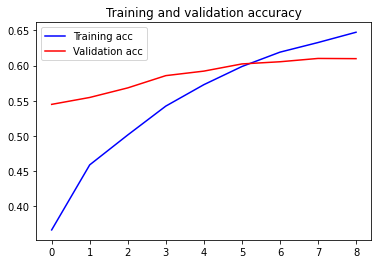

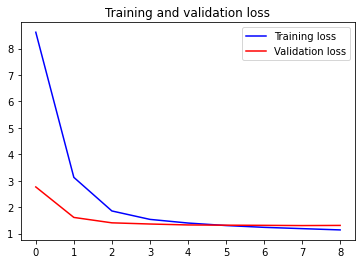

In [8]:

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from VGG. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(vgg_conv.layers):
   print(i, layer.name)


0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [10]:

# we chose to train the top blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in vgg_conv.layers[:15]:
   layer.trainable = False
for layer in vgg_conv.layers[15:]:
   layer.trainable = True
    
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 15,250,250
Trainable params: 7,614,986
Non-trainable params: 7,635,264
_________________________________________________________________


In [15]:
# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9),
              loss='categorical_crossentropy', metrics=['acc'])

In [16]:
history = model.fit(x_train, y_train,
              batch_size=64,
              epochs=3,
              validation_data=(x_test, y_test))

Epoch 1/3
782/782 [==============================] - 2276s 3s/step - loss: 1.2340 - acc: 0.5822 - val_loss: 0.9851 - val_acc: 0.6705
Epoch 2/3
782/782 [==============================] - 2330s 3s/step - loss: 0.9182 - acc: 0.6839 - val_loss: 0.9070 - val_acc: 0.6975
Epoch 3/3
782/782 [==============================] - 2306s 3s/step - loss: 0.7915 - acc: 0.7253 - val_loss: 0.8698 - val_acc: 0.7113


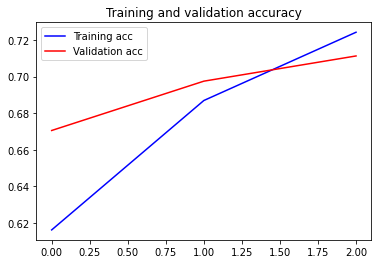

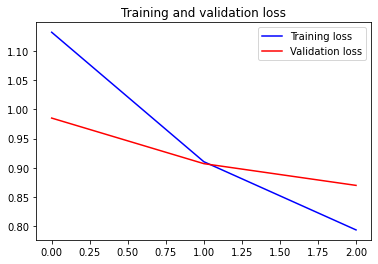

In [17]:
# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()